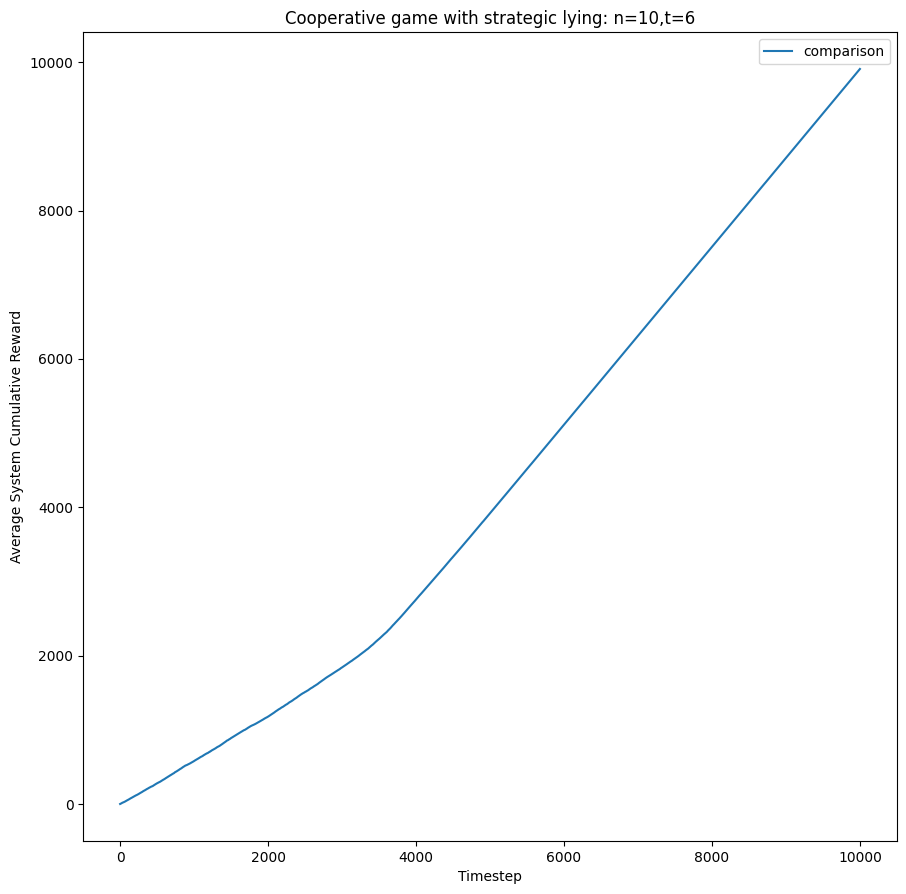

In [1]:
import matplotlib.pyplot as plt
import numpy as np

# set parameters
n = 10
t = 6

# load simulation results
cum_rew_1 = np.load(f'data/comparison/n{n}t{t}_cum_rew.npy')
#cum_rew_2 = np.load(f'data/control/n{n}t{t}div{div}_cum_rew.npy')

# average over the simulations
cum_rew_1 = np.mean(cum_rew_1, axis=0)
#cum_rew_2= np.mean(cum_rew_2, axis=0)

# plot cum rew graphs
plt.title(f'Cooperative game with strategic lying: n={n},t={t}')
plt.xlabel('Timestep')
plt.ylabel('Average System Cumulative Reward')
plt.plot(cum_rew_1, label='comparison')
#plt.plot(cum_rew_2, label='control')
fig = plt.gcf()
fig.set_size_inches(10.5, 10.5)

plt.legend()

In [8]:
actions_1 = np.load(f'data/comparison/n{n}t{t}_actions.npy')

fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(15, 12))
axes = axes.flatten()
for i in range(n):
    ax = axes[i]
    ax.plot(actions_1 [:,i])
    ax.set_title(f'Agent {i + 1}')
    ax.set_xlabel('X-axis label')
    ax.set_ylabel('Y-axis label')


FileNotFoundError: [Errno 2] No such file or directory: 'data/comparison/n10t6_actions.npy'